
[[0, 2.0], [0, 2.0], [0, 0.1029342350759288, 0.016685209657052225, 1.8803805552670187], [0, 2.0], [0, 2.0], [0, 2.0], [0, 1.4931606091986458, 0.32092567176125675, 0.1859137190400979]]
[0, 2.0, 0, 2.0, 0, 0.1029342350759288, 0.016685209657052225, 1.8803805552670187, 0, 2.0, 0, 2.0, 0, 2.0, 0, 1.4931606091986458, 0.32092567176125675, 0.1859137190400979]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


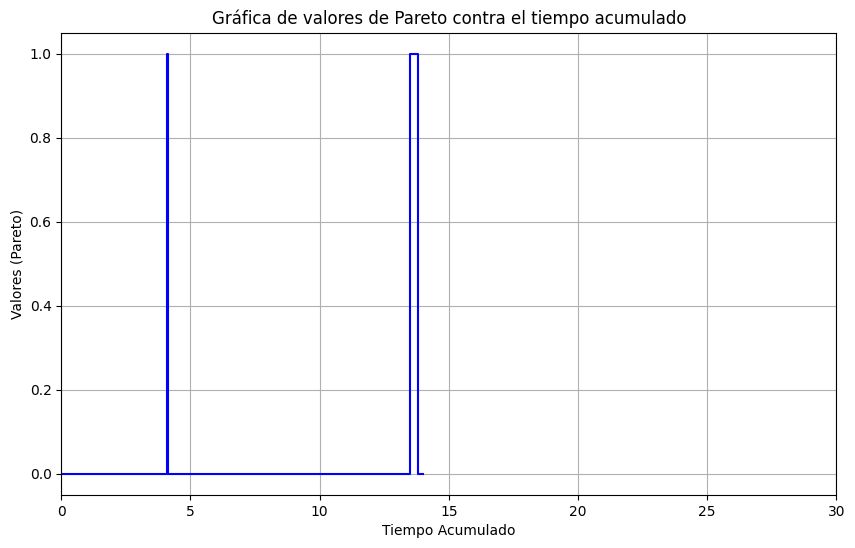

In [12]:
from scipy.stats import pareto  # Usar un alias para evitar conflictos
import matplotlib.pyplot as plt
import numpy as np

def calculate_pareto(num_ont=5, traf_pas=[]):
        # Parámetros de la distribución de Pareto
        alpha_ON = 2  # Parámetro de forma (alfa)
        alpha_OFF = 1  # Parámetro de forma (alfa)
        Vel_tx_max = 2e9 # 2 Gbps de velocidad de transmisión máxima
        duracion_ciclo = 2e-3 # 2ms de ciclo en redes ópticas PON

        # Guardamos los valores de los bits de cada ont en esta lista para la cola de la ont
        trafico_futuro_valores=[]

        lista_trafico_act=[]

        for i in range(num_ont):
            print(i)
            # Generar valores aleatorios de la distribución de Pareto para cada ont
            # Para cada ont, generamos 'num_samples' valores
            #De momento solo creo una ont
            if(traf_pas == []):
              trafico_pareto = list(np.random.pareto(alpha_ON, size=(1)))
              trafico_pareto = trafico_pareto+(list(np.random.pareto(alpha_OFF, size=(1))))
              trafico_pareto = list(trafico_pareto)
            else:
              trafico_pareto = traf_pas[i]

            #print(trafico_pareto)

            suma=sum(trafico_pareto)
            #print(suma)
            #Debe de ser menor a 2 milisegundos
            while(suma<2):
              trafico_pareto=trafico_pareto+(list(np.random.pareto(alpha_ON, size=(1))))+(list(np.random.pareto(alpha_OFF, size=(1))))
              #print(trafico_pareto)
              suma=sum(trafico_pareto)
              #print(suma)
            traf_act=[]
            suma=0
            while(suma<2):
              traf_act.append(trafico_pareto.pop(0))
              suma=sum(traf_act)

            print(traf_act)
            print(suma)  
            traf_fut=[0, 0]
            if(len(traf_act)%2==0):
              traf_fut[0]=0
              traf_fut[1]=suma-2
              traf_act[-1]=traf_act[-1]-traf_fut[1]
            else:
              traf_fut[0]=suma-2
              traf_fut[1]=trafico_pareto[-1]              
              traf_act[-1]=traf_act[-1]-traf_fut[0]

            
            #print(traf_fut)
            vol_traf_act=sum(traf_act[::2])*Vel_tx_max
            lista_trafico_act.append(vol_traf_act)
            trafico_futuro_valores.append(traf_fut)
            print(traf_act)

        return lista_trafico_act, traf_act, trafico_futuro_valores
"""
trafico_actual, trafico_futuro=calculate_pareto(5)

for i in range(5):
    print(f"El valor del trafico entrante en el ciclo calculado para la ONT {i+1} es de: {trafico_actual[i]} bits")
    #El 2º valor del off es o nulo porque no cabe mas en 2ms o el valor de llegar a este 2ms o su propio valor que es llegar a 2ms
    print(f"El trafico de la ONT {i+1} calculado con para el inicio del siguiente ciclo: {trafico_futuro[i]}")
    print()

trafico_actual, trafico_futuro=calculate_pareto(num_ont=5,traf_pas=trafico_futuro)

for i in range(5):
    print(f"El valor del trafico entrante en el ciclo calculado para la ONT {i+1} es de: {trafico_actual[i]} bits")
    #El 2º valor del off es o nulo porque no cabe mas en 2ms o el valor de llegar a este 2ms o su propio valor que es llegar a 2ms
    print(f"El trafico de la ONT {i+1} calculado con para el inicio del siguiente ciclo: {trafico_futuro[i]}")
    print()
"""

def grafico_pareto(valores_instantes):

    valoresInstantesFinales=[]
    valoresPareto=[]

    # Modificar los valores de Pareto en posiciones pares donde el instante es 0
    for i in valores_instantes:
        cont=0
        for j in i:
            if cont%2==0:
                if j==0:
                    valoresInstantesFinales.append(j)
                    valoresPareto.append(0)
                else:
                    valoresInstantesFinales.append(j)
                    valoresPareto.append(1)
            else:
                if j==0:
                    valoresInstantesFinales.append(j)
                    valoresPareto.append(0)
                else:
                    valoresInstantesFinales.append(j)
                    valoresPareto.append(0)

            cont+=1
    
    print("")
    print(valores_instantes)
    print(valoresInstantesFinales)
    print(valoresPareto)


    # Crear una lista extendida para los instantes y valores Pareto
    extended_instantes = []  # Comenzar desde tiempo 0
    extended_pareto = []
    
    current_time = 0  # Tiempo acumulado actual
    
    # Añadir valores extendidos para mantener el gráfico en el eje y hasta el siguiente instante
    for i, valor in enumerate(valoresInstantesFinales):
        current_time += valor
        # Añadir el tiempo actual y su valor correspondiente de Pareto
        extended_instantes.append(current_time)
        if i < len(valoresPareto) - 1:
            extended_pareto.append(valoresPareto[i])
            extended_instantes.append(current_time)
            extended_pareto.append(valoresPareto[i+1])
        else:
            extended_pareto.append(valoresPareto[i])
    
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.step(extended_instantes, extended_pareto, where='post', linestyle='-', color='blue')
    plt.xlabel('Tiempo Acumulado')
    plt.ylabel('Valores (Pareto)')
    plt.title('Gráfica de valores de Pareto contra el tiempo acumulado')
    plt.xlim([0,30])
    plt.grid(True)
    plt.show()


valoresInstantes = [[0, 2.0], [0, 2.0], [0, 0.1029342350759288, 0.016685209657052225, 1.8803805552670187], [0, 2.0], [0, 2.0], [0, 2.0], [0, 1.4931606091986458, 0.32092567176125675, 0.1859137190400979]]

grafico_pareto(valoresInstantes)